In [ ]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

#for RBN
from keras.layers import Layer, Flatten, Dense
from keras import backend as K
from sklearn.metrics import classification_report


from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from tensorflow.keras.utils import to_categorical


In [ ]:
#fixed random seed for reproducibility 
np.random.seed(0)

In [ ]:
from google.colab import files
uploaded = files.upload()

# load dataset (input variables = X, output variables = Y)
df = pd.read_csv("TrainingData.csv")

#count the number of occurances for each osID
OsID_counts = df['OsID'].value_counts()

#filter for osIDs that have 10 or more occurances
OsID_counts_filtered = OsID_counts[OsID_counts >= 10]

#assign a label for each osID 
OsID_labels = {}
class_no = 1
for osID in OsID_counts_filtered.index:
    OsID_labels[osID] = class_no
    class_no +=1

#filter the dataset with osID that contain 10 or more occurances
dataGene = df[df['OsID'].isin(OsID_counts_filtered.index)]

dataGene = dataGene.drop(['Class', 'Trait'],axis=1)

# Add a new column 'class' to the filtered dataset
dataGene['class'] = dataGene['OsID'].map(OsID_labels)

print("Summary of dataGene:\n",dataGene.describe())


Saving TrainingData.csv to TrainingData (1).csv
Summary of dataGene:
        log_2FoldChange            ET  CoExpression           PCC  \
count     41110.000000  41110.000000  41110.000000  41110.000000   
mean         -0.037332      1.407395      0.991997     -0.361737   
std           0.391444      0.784327      0.089101      0.463979   
min          -1.000000      0.000000      0.000000     -1.000000   
25%          -0.251534      1.000000      1.000000     -0.747963   
50%           0.030675      2.000000      1.000000     -0.449089   
75%           0.251534      2.000000      1.000000     -0.051646   
max           1.000000      2.000000      1.000000      1.000000   

                PPI  Root10DaysSeedling  Root14DaysSeedling  \
count  41110.000000        41110.000000        41110.000000   
mean       0.914668           -0.522040           -0.646982   
std        0.279379            0.498568            0.393549   
min        0.000000           -1.000000           -1.000000   
25

In [ ]:
X = dataGene.drop(['class','OsID'], axis=1) # exclude class & OsID column
Y = dataGene['class']

#input feature names in order of descending importance scores in MI feature selection method
feature_names = ['Root10DaysSeedling', 'Shoot10DaysSeedling', 'Root35DaysSeedling', 'Leaf45DaysOldPlant', 'Shoot35DaysSeedling', 
                 'Root14DaysSeedling', 'Root24DaysSeedling', 'Root17DaysSeedling', 'Root21DaysSeedling', 'Shoot3DaysSeedling', 
                 'Shoot21DaysSeedling', 'PCC', 'Shoot14DaysSeedling', 'Root52DaysSeedling', 'Shoot17DaysSeedling', 
                 'Leaf21DaysSeedling', 'log_2FoldChange', 'ET', 'PPI', 'CoExpression' ]

X_fs = X.reindex(columns=feature_names)

print("Shape of X:\n",X_fs.shape)
print("Shape of Y:\n",Y.shape)

# Statistical summary of the variables
print("Summary of X:\n",X_fs.describe())
print("Summary of Y:\n",Y.describe())

# Check for class imbalance
print(df.groupby(Y).size())

# change both input and target variables datatype to ndarray
X_fs = X_fs.values # 2-D array

# select target variable 

Y = Y.values #1-D array
Y = Y.reshape(-1, 1)

Shape of X:
 (41110, 20)
Shape of Y:
 (41110,)
Summary of X:
        Root10DaysSeedling  Shoot10DaysSeedling  Root35DaysSeedling  \
count        41110.000000         41110.000000        41110.000000   
mean            -0.522040            -0.545055           -0.596196   
std              0.498568             0.477438            0.461679   
min             -1.000000            -1.000000           -1.000000   
25%             -0.901371            -0.906055           -0.937286   
50%             -0.663664            -0.698864           -0.769184   
75%             -0.378497            -0.250588           -0.323664   
max              1.000000             1.000000            1.000000   

       Leaf45DaysOldPlant  Shoot35DaysSeedling  Root14DaysSeedling  \
count        41110.000000         41110.000000        41110.000000   
mean            -0.585144            -0.558906           -0.646982   
std              0.399046             0.506423            0.393549   
min             -1.000000  

Class=0, n=1800 (4.378%)
Class=1, n=1296 (3.153%)
Class=2, n=1260 (3.065%)
Class=3, n=1218 (2.963%)
Class=4, n=1026 (2.496%)
Class=5, n=1008 (2.452%)
Class=6, n=930 (2.262%)
Class=7, n=912 (2.218%)
Class=8, n=880 (2.141%)
Class=9, n=798 (1.941%)
Class=10, n=792 (1.927%)
Class=11, n=759 (1.846%)
Class=12, n=729 (1.773%)
Class=13, n=720 (1.751%)
Class=14, n=702 (1.708%)
Class=15, n=693 (1.686%)
Class=16, n=672 (1.635%)
Class=17, n=640 (1.557%)
Class=18, n=625 (1.520%)
Class=19, n=570 (1.387%)
Class=20, n=546 (1.328%)
Class=21, n=506 (1.231%)
Class=22, n=483 (1.175%)
Class=23, n=448 (1.090%)
Class=24, n=432 (1.051%)
Class=25, n=384 (0.934%)
Class=26, n=360 (0.876%)
Class=27, n=360 (0.876%)
Class=28, n=320 (0.778%)
Class=29, n=312 (0.759%)
Class=30, n=312 (0.759%)
Class=31, n=306 (0.744%)
Class=32, n=304 (0.739%)
Class=33, n=299 (0.727%)
Class=34, n=297 (0.722%)
Class=35, n=296 (0.720%)
Class=36, n=280 (0.681%)
Class=37, n=264 (0.642%)
Class=38, n=260 (0.632%)
Class=39, n=253 (0.615%)
Clas

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


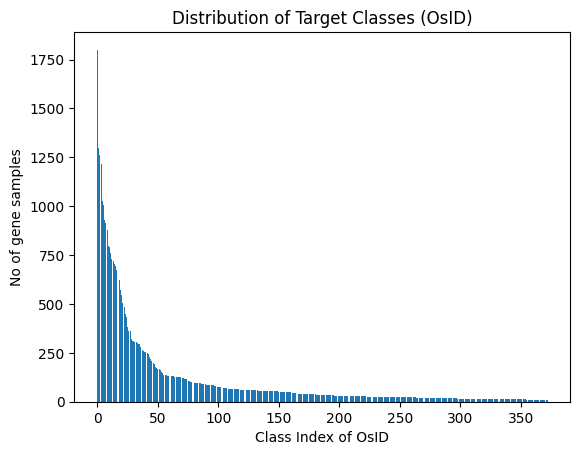

In [ ]:
y_labelenc = LabelEncoder().fit_transform(Y)

from collections import Counter
# summarize distribution
counter = Counter(y_labelenc)

# sort counter by keys
counter = dict(sorted(counter.items()))


for k,v in counter.items():
 per = v / len(y_labelenc) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar( counter.keys(), counter.values())

plt.ylabel('No of gene samples')
plt.xlabel('Class Index of OsID')
plt.title('Distribution of Target Classes (OsID)')
plt.show()

In [ ]:
# prepare target data
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	
	#fit the encoders only to the training data and then transform both train and test data
	y_train_enc = le.fit_transform(y_train)
	y_test_enc = le.transform(y_test)

	return y_train_enc, y_test_enc

In [ ]:
# define the RBFLayer layer as a custom layer
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
# prepare target data
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	
	#fit the encoders only to the training data and then transform both train and test data
	y_train_enc = le.fit_transform(y_train)
	y_test_enc = le.transform(y_test)

	return y_train_enc, y_test_enc

In [ ]:
# define baseline model (RBFN)
def RBFN_model(input_dim):

    model = Sequential()
    model.add(Flatten(input_shape=(input_dim,)))
    #add the RBF layer
    model.add(RBFLayer(10, 0.5))
    
    model.add(Dense(60, input_dim=input_dim, activation='relu',bias_initializer='normal',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(20,bias_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(20,bias_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(373,kernel_initializer='normal',activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fs, Y, test_size=0.33, random_state=1)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Define the number of folds for k-fold cross-validation
k = 2

# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=k)

# Initialize the list to store the history, train & validation(accuracy & loss) for each model
models = []
model_history = []
model_accuracy = []
model_train_acc = []
model_train_loss = []
model_val_acc = []
model_val_loss = []


for i in range(1,21):

    models_fold = []
    hist = []
    train_accuracy = []
    train_loss = []
    val_accuracy = []
    val_loss = []
    test_accuracy = []

    print("Number of input features:",i)

    # Select the input features from the input data
    X_train_selected = X_train[:, :i]
    X_test_selected = X_test[:, :i]

    # Loop over the folds
    for fold, (train_index, val_index) in enumerate(cv_method.split(X_train_selected, y_train)):

        print("Fold:", fold+1)

        # Split the data into train and validation sets using the current fold index
        X_train_fold  = X_train_selected[train_index]
        y_train_fold  = y_train[train_index]
        X_val_fold = X_train_selected[val_index]
        y_val_fold = y_train[val_index]

        # Prepare the target data
        y_train_fold_enc, y_val_fold_enc = prepare_targets(y_train_fold, y_val_fold)

        # build the model
        model = RBFN_model(i)

        # Fit the model to the training data for the current fold
        history = model.fit(X_train_fold, to_categorical(y_train_fold_enc, num_classes=373), epochs=20, batch_size=5, verbose=1, validation_split = 0.33)
    
        # Evaluate the model on the validation data for the current fold
        val_scores = model.evaluate(X_val_fold, to_categorical(y_val_fold_enc, num_classes=373), verbose=0)
        val_accuracy.append(val_scores[1])
        val_loss.append(val_scores[0])

        # Evaluate the model on the test data for the current fold
        test_scores = model.evaluate(X_test_selected, to_categorical(y_test_enc, num_classes=373), verbose=0)
        test_accuracy.append(test_scores[1])

        # add the model to the list of models
        models_fold.append(model)
        hist.append(history)

        # store the training accuracy and loss for each fold
        train_accuracy.append(history.history['accuracy'])
        train_loss.append(history.history['loss'])
        
    # Calculate the average test and validation accuracy and loss across all folds
    avg_test_acc = sum(test_accuracy) / len(test_accuracy)
    avg_val_acc = sum(val_accuracy) / len(val_accuracy)
    avg_val_loss = sum(val_loss) / len(val_loss)

    # Print the average validation and test accuracy and loss
    print("Average Validation Accuracy:", avg_val_acc)
    print("Average Validation Loss:",avg_val_loss)
    print("Average Test Accuracy:", avg_test_acc)

    best_fold_index = test_accuracy.index(max(test_accuracy))
    model_accuracy.append(test_accuracy[best_fold_index])
    models.append(models_fold[best_fold_index])
    model_history.append(hist[best_fold_index])
    model_train_acc.append(train_accuracy[best_fold_index])
    model_train_loss.append(train_loss[best_fold_index])
    model_val_acc.append(val_accuracy[best_fold_index])
    model_val_loss.append(val_loss[best_fold_index])


    print("Final Test Accuracy for each fold:", test_accuracy[best_fold_index])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Number of input features: 1
Fold: 1
Epoch 1/20
1846/1846 [==============================] - 8s 3ms/step - loss: 5.0159 - accuracy: 0.0405 - val_loss: 4.9309 - val_accuracy: 0.0750
Epoch 2/20
1846/1846 [==============================] - 5s 2ms/step - loss: 4.5377 - accuracy: 0.0819 - val_loss: 4.3079 - val_accuracy: 0.1336
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.0122 - accuracy: 0.1360 - val_loss: 3.9687 - val_accuracy: 0.1373
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.7030 - accuracy: 0.1845 - val_loss: 3.7214 - val_accuracy: 0.2295
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.4337 - accuracy: 0.2234 - val_loss: 3.5116 - val_accuracy: 0.1945
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.1936 - accuracy: 0.2447 - val_loss: 3.3038 - val_accuracy: 0.2460
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.0096 - accuracy: 0.270

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 5.0065 - accuracy: 0.0405 - val_loss: 4.9439 - val_accuracy: 0.0440
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.5636 - accuracy: 0.0805 - val_loss: 4.3381 - val_accuracy: 0.1107
Epoch 3/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.9877 - accuracy: 0.1296 - val_loss: 3.9831 - val_accuracy: 0.1650
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6466 - accuracy: 0.1771 - val_loss: 3.7024 - val_accuracy: 0.2154
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.3242 - accuracy: 0.2435 - val_loss: 3.4396 - val_accuracy: 0.2629
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.0670 - accuracy: 0.2867 - val_loss: 3.2416 - val_accuracy: 0.3043
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8836 - accuracy: 0.3136 - val_loss: 3.1233 - val_accuracy: 0.2519
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 5.0258 - accuracy: 0.0412 - val_loss: 4.8877 - val_accuracy: 0.0750
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 4.3481 - accuracy: 0.1119 - val_loss: 4.1035 - val_accuracy: 0.1542
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.7820 - accuracy: 0.1672 - val_loss: 3.7581 - val_accuracy: 0.1787
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.4699 - accuracy: 0.2015 - val_loss: 3.5436 - val_accuracy: 0.2499
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.2688 - accuracy: 0.2193 - val_loss: 3.3694 - val_accuracy: 0.2532
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.1162 - accuracy: 0.2430 - val_loss: 3.2641 - val_accuracy: 0.2724
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.9820 - accuracy: 0.2641 - val_loss: 3.1383 - val_accuracy: 0.2803
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.9163 - accuracy: 0.0523 - val_loss: 4.5477 - val_accuracy: 0.0900
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.9959 - accuracy: 0.1926 - val_loss: 3.5742 - val_accuracy: 0.2990
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.9382 - accuracy: 0.3874 - val_loss: 2.8617 - val_accuracy: 0.4554
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.3061 - accuracy: 0.5042 - val_loss: 2.3990 - val_accuracy: 0.5204
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.8937 - accuracy: 0.5566 - val_loss: 2.1499 - val_accuracy: 0.5450
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6390 - accuracy: 0.5807 - val_loss: 1.8900 - val_accuracy: 0.6152
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.4658 - accuracy: 0.6075 - val_loss: 1.7807 - val_accuracy: 0.6024
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.9777 - accuracy: 0.0493 - val_loss: 4.6642 - val_accuracy: 0.1127
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.8553 - accuracy: 0.2078 - val_loss: 3.3839 - val_accuracy: 0.3063
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.8746 - accuracy: 0.3918 - val_loss: 2.7357 - val_accuracy: 0.4827
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.2859 - accuracy: 0.4948 - val_loss: 2.3016 - val_accuracy: 0.5041
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.8879 - accuracy: 0.5689 - val_loss: 2.0876 - val_accuracy: 0.5593
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6325 - accuracy: 0.6188 - val_loss: 1.9143 - val_accuracy: 0.5927
Epoch 7/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.4585 - accuracy: 0.6498 - val_loss: 1.6733 - val_accuracy: 0.6724
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 9s 4ms/step - loss: 5.0281 - accuracy: 0.0376 - val_loss: 4.9253 - val_accuracy: 0.0328
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.5082 - accuracy: 0.0911 - val_loss: 4.3145 - val_accuracy: 0.1606
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.7255 - accuracy: 0.2080 - val_loss: 3.3864 - val_accuracy: 0.2902
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.7582 - accuracy: 0.3932 - val_loss: 2.7479 - val_accuracy: 0.4088
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1431 - accuracy: 0.5100 - val_loss: 2.3593 - val_accuracy: 0.5116
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.7692 - accuracy: 0.5905 - val_loss: 2.1211 - val_accuracy: 0.5943
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5296 - accuracy: 0.6297 - val_loss: 1.9217 - val_accuracy: 0.6425
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.9215 - accuracy: 0.0623 - val_loss: 4.3687 - val_accuracy: 0.2284
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.5329 - accuracy: 0.3023 - val_loss: 3.2186 - val_accuracy: 0.3485
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.6791 - accuracy: 0.4245 - val_loss: 2.6043 - val_accuracy: 0.5120
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.1642 - accuracy: 0.5203 - val_loss: 2.2706 - val_accuracy: 0.5413
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.7925 - accuracy: 0.5796 - val_loss: 1.9759 - val_accuracy: 0.6205
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.5550 - accuracy: 0.6230 - val_loss: 1.8322 - val_accuracy: 0.6040
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.4031 - accuracy: 0.6482 - val_loss: 1.7276 - val_accuracy: 0.6409
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.9801 - accuracy: 0.0513 - val_loss: 4.5698 - val_accuracy: 0.1149
Epoch 2/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.8833 - accuracy: 0.2153 - val_loss: 3.5798 - val_accuracy: 0.3052
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.0369 - accuracy: 0.3925 - val_loss: 3.0909 - val_accuracy: 0.3828
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.5461 - accuracy: 0.4649 - val_loss: 2.7999 - val_accuracy: 0.4757
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1788 - accuracy: 0.5295 - val_loss: 2.5336 - val_accuracy: 0.5364
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.8572 - accuracy: 0.5953 - val_loss: 2.3833 - val_accuracy: 0.5685
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5942 - accuracy: 0.6494 - val_loss: 2.1359 - val_accuracy: 0.6779
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.6660 - accuracy: 0.0765 - val_loss: 4.1650 - val_accuracy: 0.1120
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.7466 - accuracy: 0.1941 - val_loss: 3.5165 - val_accuracy: 0.2992
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.8313 - accuracy: 0.4216 - val_loss: 2.6216 - val_accuracy: 0.5030
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1129 - accuracy: 0.5224 - val_loss: 2.2081 - val_accuracy: 0.5525
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.7103 - accuracy: 0.5930 - val_loss: 1.9307 - val_accuracy: 0.6167
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4621 - accuracy: 0.6406 - val_loss: 1.7610 - val_accuracy: 0.6697
Epoch 7/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.2956 - accuracy: 0.6794 - val_loss: 1.7155 - val_accuracy: 0.6653
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.5190 - accuracy: 0.0849 - val_loss: 4.0702 - val_accuracy: 0.1197
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.4825 - accuracy: 0.2832 - val_loss: 3.3323 - val_accuracy: 0.3859
Epoch 3/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.7218 - accuracy: 0.4469 - val_loss: 2.7750 - val_accuracy: 0.4438
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1616 - accuracy: 0.5258 - val_loss: 2.3472 - val_accuracy: 0.5813
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.7858 - accuracy: 0.5924 - val_loss: 2.1503 - val_accuracy: 0.5549
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5373 - accuracy: 0.6382 - val_loss: 1.9873 - val_accuracy: 0.6334
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.3496 - accuracy: 0.6770 - val_loss: 1.8567 - val_accuracy: 0.6680
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.6648 - accuracy: 0.0628 - val_loss: 4.1328 - val_accuracy: 0.0689
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6044 - accuracy: 0.2256 - val_loss: 3.3361 - val_accuracy: 0.3457
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.6830 - accuracy: 0.4651 - val_loss: 2.5547 - val_accuracy: 0.5406
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.9804 - accuracy: 0.5936 - val_loss: 2.0748 - val_accuracy: 0.6123
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.5712 - accuracy: 0.6484 - val_loss: 1.8117 - val_accuracy: 0.6442
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.3375 - accuracy: 0.6769 - val_loss: 1.6388 - val_accuracy: 0.6592
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.1770 - accuracy: 0.7088 - val_loss: 1.4954 - val_accuracy: 0.6979
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.5227 - accuracy: 0.0776 - val_loss: 4.0094 - val_accuracy: 0.1476
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.4930 - accuracy: 0.2584 - val_loss: 3.3514 - val_accuracy: 0.3241
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.7870 - accuracy: 0.4417 - val_loss: 2.8403 - val_accuracy: 0.4946
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.2468 - accuracy: 0.5368 - val_loss: 2.5186 - val_accuracy: 0.5564
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.8797 - accuracy: 0.5889 - val_loss: 2.2338 - val_accuracy: 0.6240
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.5982 - accuracy: 0.6385 - val_loss: 2.0780 - val_accuracy: 0.6719
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.4025 - accuracy: 0.6770 - val_loss: 1.8827 - val_accuracy: 0.7127
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/20
1846/1846 [==============================] - 8s 3ms/step - loss: 4.5557 - accuracy: 0.0893 - val_loss: 4.0715 - val_accuracy: 0.1303
Epoch 2/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.5110 - accuracy: 0.2434 - val_loss: 3.1238 - val_accuracy: 0.4097
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.4844 - accuracy: 0.4718 - val_loss: 2.3922 - val_accuracy: 0.5470
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.8769 - accuracy: 0.5832 - val_loss: 1.9507 - val_accuracy: 0.6297
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4732 - accuracy: 0.6600 - val_loss: 1.6599 - val_accuracy: 0.6827
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.2320 - accuracy: 0.7029 - val_loss: 1.4864 - val_accuracy: 0.6997
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.0849 - accuracy: 0.7268 - val_loss: 1.3727 - val_accuracy:

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.5976 - accuracy: 0.0794 - val_loss: 4.0530 - val_accuracy: 0.1514
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.3378 - accuracy: 0.3242 - val_loss: 3.1009 - val_accuracy: 0.4139
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.5536 - accuracy: 0.4577 - val_loss: 2.5947 - val_accuracy: 0.5043
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.0563 - accuracy: 0.5525 - val_loss: 2.2391 - val_accuracy: 0.5795
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6731 - accuracy: 0.6252 - val_loss: 1.9911 - val_accuracy: 0.6449
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.4224 - accuracy: 0.6668 - val_loss: 1.8731 - val_accuracy: 0.6471
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.2642 - accuracy: 0.6947 - val_loss: 1.7127 - val_accuracy: 0.6845
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.5972 - accuracy: 0.0781 - val_loss: 4.0965 - val_accuracy: 0.1010
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.6444 - accuracy: 0.1784 - val_loss: 3.4555 - val_accuracy: 0.2460
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8586 - accuracy: 0.4103 - val_loss: 2.6724 - val_accuracy: 0.4889
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1269 - accuracy: 0.5617 - val_loss: 2.1839 - val_accuracy: 0.5498
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.6705 - accuracy: 0.6290 - val_loss: 1.8379 - val_accuracy: 0.6323
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4031 - accuracy: 0.6666 - val_loss: 1.6617 - val_accuracy: 0.6779
Epoch 7/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.2299 - accuracy: 0.6960 - val_loss: 1.5395 - val_accuracy: 0.7065
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.3950 - accuracy: 0.0910 - val_loss: 4.0062 - val_accuracy: 0.1153
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.5936 - accuracy: 0.1780 - val_loss: 3.4213 - val_accuracy: 0.3182
Epoch 3/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.8021 - accuracy: 0.4367 - val_loss: 2.7768 - val_accuracy: 0.5032
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.2149 - accuracy: 0.5326 - val_loss: 2.4947 - val_accuracy: 0.5516
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.8353 - accuracy: 0.6036 - val_loss: 2.2242 - val_accuracy: 0.6139
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.5866 - accuracy: 0.6533 - val_loss: 2.0434 - val_accuracy: 0.6554
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4081 - accuracy: 0.6780 - val_loss: 1.9020 - val_accuracy: 0.6812
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.5819 - accuracy: 0.0960 - val_loss: 4.0513 - val_accuracy: 0.1758
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.4928 - accuracy: 0.2550 - val_loss: 3.2759 - val_accuracy: 0.3839
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.6879 - accuracy: 0.4443 - val_loss: 2.6311 - val_accuracy: 0.5182
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.0884 - accuracy: 0.5677 - val_loss: 2.1983 - val_accuracy: 0.6088
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6689 - accuracy: 0.6523 - val_loss: 1.8972 - val_accuracy: 0.6394
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.3891 - accuracy: 0.6913 - val_loss: 1.7039 - val_accuracy: 0.6838
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.1905 - accuracy: 0.7218 - val_loss: 1.5662 - val_accuracy: 0.6990
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.4487 - accuracy: 0.1069 - val_loss: 4.0756 - val_accuracy: 0.1512
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6303 - accuracy: 0.1972 - val_loss: 3.4885 - val_accuracy: 0.2387
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.8986 - accuracy: 0.3634 - val_loss: 2.7469 - val_accuracy: 0.4944
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1660 - accuracy: 0.5429 - val_loss: 2.2124 - val_accuracy: 0.5789
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.7078 - accuracy: 0.6201 - val_loss: 1.9073 - val_accuracy: 0.6376
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4166 - accuracy: 0.6663 - val_loss: 1.6305 - val_accuracy: 0.6878
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.2247 - accuracy: 0.6970 - val_loss: 1.5406 - val_accuracy: 0.6964
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.4504 - accuracy: 0.0983 - val_loss: 3.9321 - val_accuracy: 0.1435
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.4491 - accuracy: 0.2142 - val_loss: 3.2690 - val_accuracy: 0.2680
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.6693 - accuracy: 0.4027 - val_loss: 2.4691 - val_accuracy: 0.5118
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.8958 - accuracy: 0.5766 - val_loss: 1.8907 - val_accuracy: 0.6284
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.3982 - accuracy: 0.6658 - val_loss: 1.5952 - val_accuracy: 0.6691
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.1465 - accuracy: 0.7093 - val_loss: 1.4522 - val_accuracy: 0.7003
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.0019 - accuracy: 0.7372 - val_loss: 1.3207 - val_accuracy: 0.7406
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.4897 - accuracy: 0.1013 - val_loss: 4.0016 - val_accuracy: 0.1780
Epoch 2/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.5302 - accuracy: 0.2039 - val_loss: 3.4041 - val_accuracy: 0.3008
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.9042 - accuracy: 0.3627 - val_loss: 2.8732 - val_accuracy: 0.4255
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.3733 - accuracy: 0.4652 - val_loss: 2.4707 - val_accuracy: 0.5107
Epoch 5/20
1846/1846 [==============================] - 5s 2ms/step - loss: 1.9837 - accuracy: 0.5377 - val_loss: 2.2044 - val_accuracy: 0.5848
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.7024 - accuracy: 0.5989 - val_loss: 2.0244 - val_accuracy: 0.5760
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.5059 - accuracy: 0.6451 - val_loss: 1.8858 - val_accuracy: 0.6444
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.4575 - accuracy: 0.1028 - val_loss: 3.9071 - val_accuracy: 0.2295
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.2336 - accuracy: 0.3298 - val_loss: 2.9108 - val_accuracy: 0.4552
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.3824 - accuracy: 0.4926 - val_loss: 2.2999 - val_accuracy: 0.5646
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.8245 - accuracy: 0.5976 - val_loss: 1.8818 - val_accuracy: 0.6372
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.4397 - accuracy: 0.6646 - val_loss: 1.6638 - val_accuracy: 0.6557
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.2024 - accuracy: 0.7088 - val_loss: 1.4326 - val_accuracy: 0.7204
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.0609 - accuracy: 0.7359 - val_loss: 1.3715 - val_accuracy: 0.7118
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.5065 - accuracy: 0.0983 - val_loss: 4.0788 - val_accuracy: 0.1226
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6076 - accuracy: 0.1932 - val_loss: 3.4564 - val_accuracy: 0.2524
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8444 - accuracy: 0.3548 - val_loss: 2.6578 - val_accuracy: 0.4502
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.0336 - accuracy: 0.5463 - val_loss: 2.0896 - val_accuracy: 0.5760
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5377 - accuracy: 0.6452 - val_loss: 1.7555 - val_accuracy: 0.6726
Epoch 6/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.2753 - accuracy: 0.6974 - val_loss: 1.5702 - val_accuracy: 0.7050
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.1244 - accuracy: 0.7230 - val_loss: 1.4437 - val_accuracy: 0.7217
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.5604 - accuracy: 0.0829 - val_loss: 4.1682 - val_accuracy: 0.1212
Epoch 2/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.7961 - accuracy: 0.1552 - val_loss: 3.7018 - val_accuracy: 0.1974
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.2075 - accuracy: 0.2840 - val_loss: 3.0512 - val_accuracy: 0.3831
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.5817 - accuracy: 0.4147 - val_loss: 2.6374 - val_accuracy: 0.4506
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1816 - accuracy: 0.4866 - val_loss: 2.3138 - val_accuracy: 0.5232
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.8688 - accuracy: 0.5475 - val_loss: 2.0604 - val_accuracy: 0.5615
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.5711 - accuracy: 0.6033 - val_loss: 1.8583 - val_accuracy: 0.6057
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.6350 - accuracy: 0.0732 - val_loss: 4.2427 - val_accuracy: 0.1001
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6643 - accuracy: 0.2139 - val_loss: 3.4027 - val_accuracy: 0.2942
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.8152 - accuracy: 0.3695 - val_loss: 2.8595 - val_accuracy: 0.4323
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.3114 - accuracy: 0.4703 - val_loss: 2.5723 - val_accuracy: 0.5186
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.9897 - accuracy: 0.5364 - val_loss: 2.3549 - val_accuracy: 0.5531
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.7377 - accuracy: 0.5869 - val_loss: 2.1623 - val_accuracy: 0.6125
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5451 - accuracy: 0.6248 - val_loss: 2.0432 - val_accuracy: 0.6145
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.4270 - accuracy: 0.1056 - val_loss: 3.9504 - val_accuracy: 0.1479
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.5443 - accuracy: 0.1961 - val_loss: 3.3719 - val_accuracy: 0.2372
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8032 - accuracy: 0.3652 - val_loss: 2.6023 - val_accuracy: 0.4299
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1110 - accuracy: 0.4982 - val_loss: 2.1052 - val_accuracy: 0.5261
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.7523 - accuracy: 0.5635 - val_loss: 1.8904 - val_accuracy: 0.5639
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5379 - accuracy: 0.6064 - val_loss: 1.6923 - val_accuracy: 0.6004
Epoch 7/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.3767 - accuracy: 0.6456 - val_loss: 1.5581 - val_accuracy: 0.6702
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.7087 - accuracy: 0.0652 - val_loss: 4.2917 - val_accuracy: 0.1065
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.8538 - accuracy: 0.1485 - val_loss: 3.7026 - val_accuracy: 0.2011
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.2216 - accuracy: 0.2884 - val_loss: 3.1536 - val_accuracy: 0.3956
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.6320 - accuracy: 0.4400 - val_loss: 2.7491 - val_accuracy: 0.4647
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1833 - accuracy: 0.5188 - val_loss: 2.4596 - val_accuracy: 0.5333
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.8333 - accuracy: 0.5731 - val_loss: 2.1660 - val_accuracy: 0.5989
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5386 - accuracy: 0.6266 - val_loss: 1.9551 - val_accuracy: 0.6218
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.5644 - accuracy: 0.0790 - val_loss: 4.1138 - val_accuracy: 0.1197
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.7027 - accuracy: 0.1639 - val_loss: 3.5918 - val_accuracy: 0.2095
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.1800 - accuracy: 0.2671 - val_loss: 3.0920 - val_accuracy: 0.3360
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.6273 - accuracy: 0.3949 - val_loss: 2.6507 - val_accuracy: 0.4420
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.2165 - accuracy: 0.4879 - val_loss: 2.3517 - val_accuracy: 0.5250
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.9277 - accuracy: 0.5466 - val_loss: 2.1944 - val_accuracy: 0.5419
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6994 - accuracy: 0.5871 - val_loss: 1.9531 - val_accuracy: 0.5952
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.6581 - accuracy: 0.0706 - val_loss: 4.1838 - val_accuracy: 0.1322
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.6414 - accuracy: 0.2001 - val_loss: 3.3859 - val_accuracy: 0.3017
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8500 - accuracy: 0.3890 - val_loss: 2.7996 - val_accuracy: 0.4631
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.2643 - accuracy: 0.5099 - val_loss: 2.4066 - val_accuracy: 0.5380
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.8428 - accuracy: 0.5810 - val_loss: 2.1143 - val_accuracy: 0.5626
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5547 - accuracy: 0.6236 - val_loss: 1.8771 - val_accuracy: 0.6119
Epoch 7/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.3503 - accuracy: 0.6638 - val_loss: 1.7091 - val_accuracy: 0.6649
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.5550 - accuracy: 0.0866 - val_loss: 4.0330 - val_accuracy: 0.1274
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6181 - accuracy: 0.1871 - val_loss: 3.4656 - val_accuracy: 0.2200
Epoch 3/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.9599 - accuracy: 0.3459 - val_loss: 2.8612 - val_accuracy: 0.4178
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.4133 - accuracy: 0.4506 - val_loss: 2.5516 - val_accuracy: 0.4587
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.0481 - accuracy: 0.5260 - val_loss: 2.1952 - val_accuracy: 0.5501
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.7914 - accuracy: 0.5625 - val_loss: 2.0224 - val_accuracy: 0.5461
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.5856 - accuracy: 0.5971 - val_loss: 1.8472 - val_accuracy: 0.6196
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 4ms/step - loss: 4.6521 - accuracy: 0.0704 - val_loss: 4.1871 - val_accuracy: 0.1067
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.7318 - accuracy: 0.1715 - val_loss: 3.5894 - val_accuracy: 0.2447
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.0686 - accuracy: 0.3307 - val_loss: 3.0310 - val_accuracy: 0.4018
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.3989 - accuracy: 0.4482 - val_loss: 2.5138 - val_accuracy: 0.4722
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 1.9456 - accuracy: 0.5265 - val_loss: 2.2733 - val_accuracy: 0.5419
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6685 - accuracy: 0.5918 - val_loss: 2.0310 - val_accuracy: 0.6108
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4817 - accuracy: 0.6299 - val_loss: 1.8874 - val_accuracy: 0.6458
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.7328 - accuracy: 0.0631 - val_loss: 4.2719 - val_accuracy: 0.0972
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.8448 - accuracy: 0.1560 - val_loss: 3.6532 - val_accuracy: 0.1998
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.2494 - accuracy: 0.2703 - val_loss: 3.1105 - val_accuracy: 0.3380
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.6288 - accuracy: 0.4394 - val_loss: 2.5711 - val_accuracy: 0.4999
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1618 - accuracy: 0.5275 - val_loss: 2.2783 - val_accuracy: 0.5437
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.8486 - accuracy: 0.5706 - val_loss: 1.9914 - val_accuracy: 0.6031
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6118 - accuracy: 0.6149 - val_loss: 1.8293 - val_accuracy: 0.6044
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.7305 - accuracy: 0.0660 - val_loss: 4.2561 - val_accuracy: 0.1111
Epoch 2/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.6709 - accuracy: 0.2046 - val_loss: 3.4111 - val_accuracy: 0.3305
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8269 - accuracy: 0.3943 - val_loss: 2.8392 - val_accuracy: 0.4642
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.2930 - accuracy: 0.4978 - val_loss: 2.4976 - val_accuracy: 0.5358
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.9356 - accuracy: 0.5623 - val_loss: 2.2165 - val_accuracy: 0.5683
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6824 - accuracy: 0.5984 - val_loss: 2.0572 - val_accuracy: 0.6013
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.4891 - accuracy: 0.6350 - val_loss: 1.8588 - val_accuracy: 0.6414
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 8s 3ms/step - loss: 4.7307 - accuracy: 0.0690 - val_loss: 4.1944 - val_accuracy: 0.1030
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.7964 - accuracy: 0.1631 - val_loss: 3.6642 - val_accuracy: 0.1897
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.1306 - accuracy: 0.3267 - val_loss: 2.9744 - val_accuracy: 0.3855
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.5232 - accuracy: 0.4501 - val_loss: 2.5679 - val_accuracy: 0.4737
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.1431 - accuracy: 0.5096 - val_loss: 2.2868 - val_accuracy: 0.5278
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.8823 - accuracy: 0.5508 - val_loss: 2.0868 - val_accuracy: 0.5635
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.6942 - accuracy: 0.5831 - val_loss: 1.9220 - val_accuracy: 0.5776
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.6021 - accuracy: 0.0752 - val_loss: 4.1168 - val_accuracy: 0.1131
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.6597 - accuracy: 0.1670 - val_loss: 3.5245 - val_accuracy: 0.2341
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.9780 - accuracy: 0.3498 - val_loss: 2.8877 - val_accuracy: 0.4339
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.3762 - accuracy: 0.4622 - val_loss: 2.4754 - val_accuracy: 0.5105
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.9675 - accuracy: 0.5428 - val_loss: 2.2239 - val_accuracy: 0.5556
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.6774 - accuracy: 0.6034 - val_loss: 2.0277 - val_accuracy: 0.6046
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.4743 - accuracy: 0.6363 - val_loss: 1.8400 - val_accuracy: 0.6429
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.7482 - accuracy: 0.0673 - val_loss: 4.2303 - val_accuracy: 0.1349
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.8352 - accuracy: 0.1611 - val_loss: 3.6686 - val_accuracy: 0.1789
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.3295 - accuracy: 0.2329 - val_loss: 3.1948 - val_accuracy: 0.2972
Epoch 4/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.8295 - accuracy: 0.3524 - val_loss: 2.7532 - val_accuracy: 0.4037
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.4407 - accuracy: 0.4271 - val_loss: 2.4720 - val_accuracy: 0.4370
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.1689 - accuracy: 0.4770 - val_loss: 2.2577 - val_accuracy: 0.4920
Epoch 7/20
1846/1846 [==============================] - 6s 3ms/step - loss: 1.9738 - accuracy: 0.5129 - val_loss: 2.1101 - val_accuracy: 0.5263
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.8314 - accuracy: 0.0594 - val_loss: 4.3954 - val_accuracy: 0.0667
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.0052 - accuracy: 0.1318 - val_loss: 3.8851 - val_accuracy: 0.1551
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.5993 - accuracy: 0.1739 - val_loss: 3.5711 - val_accuracy: 0.1941
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.2468 - accuracy: 0.2402 - val_loss: 3.2370 - val_accuracy: 0.2860
Epoch 5/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.8383 - accuracy: 0.3258 - val_loss: 2.8688 - val_accuracy: 0.3474
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.5054 - accuracy: 0.4003 - val_loss: 2.6312 - val_accuracy: 0.3886
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.2595 - accuracy: 0.4596 - val_loss: 2.4357 - val_accuracy: 0.4658
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.9429 - accuracy: 0.0457 - val_loss: 4.7383 - val_accuracy: 0.0372
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.3977 - accuracy: 0.0884 - val_loss: 4.1486 - val_accuracy: 0.1096
Epoch 3/20
1846/1846 [==============================] - 7s 4ms/step - loss: 3.8355 - accuracy: 0.1656 - val_loss: 3.7738 - val_accuracy: 0.1492
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.4809 - accuracy: 0.2024 - val_loss: 3.4776 - val_accuracy: 0.2187
Epoch 5/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.1991 - accuracy: 0.2485 - val_loss: 3.1959 - val_accuracy: 0.2926
Epoch 6/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.8854 - accuracy: 0.3085 - val_loss: 2.9129 - val_accuracy: 0.3507
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.5849 - accuracy: 0.3774 - val_loss: 2.6811 - val_accuracy: 0.3831
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 6s 3ms/step - loss: 4.8616 - accuracy: 0.0570 - val_loss: 4.4540 - val_accuracy: 0.0812
Epoch 2/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.9944 - accuracy: 0.1354 - val_loss: 3.8304 - val_accuracy: 0.1721
Epoch 3/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.4591 - accuracy: 0.2093 - val_loss: 3.3743 - val_accuracy: 0.2416
Epoch 4/20
1846/1846 [==============================] - 7s 4ms/step - loss: 2.9053 - accuracy: 0.3392 - val_loss: 2.8722 - val_accuracy: 0.4255
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.4419 - accuracy: 0.4489 - val_loss: 2.5940 - val_accuracy: 0.4550
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.1422 - accuracy: 0.5051 - val_loss: 2.3738 - val_accuracy: 0.5032
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 1.9326 - accuracy: 0.5544 - val_loss: 2.1890 - val_accuracy: 0.5487
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.9595 - accuracy: 0.0413 - val_loss: 4.7804 - val_accuracy: 0.0491
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.4732 - accuracy: 0.0796 - val_loss: 4.2104 - val_accuracy: 0.1036
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.8539 - accuracy: 0.1513 - val_loss: 3.7809 - val_accuracy: 0.1703
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.4996 - accuracy: 0.1962 - val_loss: 3.4772 - val_accuracy: 0.2136
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.1678 - accuracy: 0.2568 - val_loss: 3.1549 - val_accuracy: 0.2785
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 2.7858 - accuracy: 0.3344 - val_loss: 2.9271 - val_accuracy: 0.3267
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 2.4659 - accuracy: 0.3898 - val_loss: 2.5590 - val_accuracy: 0.4268
Epo

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


1846/1846 [==============================] - 7s 3ms/step - loss: 4.9719 - accuracy: 0.0432 - val_loss: 4.8186 - val_accuracy: 0.0491
Epoch 2/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.7263 - accuracy: 0.0534 - val_loss: 4.7456 - val_accuracy: 0.0356
Epoch 3/20
1846/1846 [==============================] - 6s 3ms/step - loss: 4.6470 - accuracy: 0.0529 - val_loss: 4.6692 - val_accuracy: 0.0506
Epoch 4/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.5088 - accuracy: 0.0742 - val_loss: 4.4928 - val_accuracy: 0.0673
Epoch 5/20
1846/1846 [==============================] - 5s 3ms/step - loss: 4.2625 - accuracy: 0.0976 - val_loss: 4.2511 - val_accuracy: 0.1052
Epoch 6/20
1846/1846 [==============================] - 6s 3ms/step - loss: 3.9702 - accuracy: 0.1413 - val_loss: 3.9696 - val_accuracy: 0.1661
Epoch 7/20
1846/1846 [==============================] - 5s 3ms/step - loss: 3.6559 - accuracy: 0.1825 - val_loss: 3.6900 - val_accuracy: 0.2020
Epo

In [ ]:
#to show the no of input features and its corresponding model accuracy
model_list = []

#Iterate through each model's accuracy 
for i in range (len(model_accuracy)):
    #get the number of input features for the current model
    no_features = i + 1

    #round the model accuries to 3 d.p.
    rounded_model_acc = round(model_accuracy[i], 3)
    
    model_list.append([no_features, rounded_model_acc])

models_df = pd.DataFrame(model_list, columns=["No of input features", "Model accuracy"])

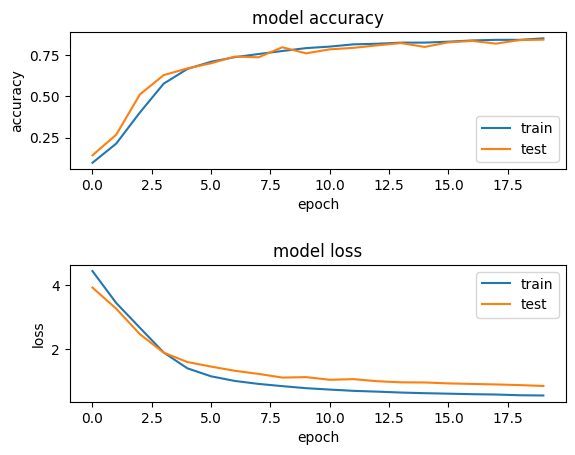

Final Test Accuracy: 0.8575956225395203


In [ ]:
# Select the final model based on the max test accuracy across all models

best_model_index = model_accuracy.index(max(model_accuracy))

best_model = models[best_model_index]
best_model_history = model_history[best_model_index]
best_model_train_acc = model_train_acc[best_model_index]
best_model_train_loss = model_train_loss[best_model_index]
best_model_val_acc = model_val_acc[best_model_index]
best_model_val_loss = model_val_loss[best_model_index]

# summarize history for accuracy  
plt.subplot(211)  
plt.plot(best_model_history.history['accuracy'])  
plt.plot(best_model_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='lower right')  

# summarize history for loss
plt.subplot(212)  
plt.plot(best_model_history.history['loss'])  
plt.plot(best_model_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.subplots_adjust(hspace=0.7)

plt.show() 

print("Final Test Accuracy:", model_accuracy[best_model_index])

In [ ]:
#Select only the optimal number of input features for X_test
X_test = X_test[:,:(best_model_index+1)]

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

# np.argmax() is used to convert the one-hot encoded predictions and test labels to class labels.
y_pred_label = np.argmax(y_pred, axis = 1)

# Print the classification report
print("Classification report:\n", classification_report(y_test_enc, y_pred_label))

424/424 [==============================] - 1s 1ms/step
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       591
           1       1.00      1.00      1.00       430
           2       1.00      1.00      1.00       419
           3       0.96      1.00      0.98       384
           4       1.00      1.00      1.00       339
           5       1.00      1.00      1.00       342
           6       1.00      1.00      1.00       310
           7       1.00      1.00      1.00       325
           8       0.86      1.00      0.92       294
           9       0.96      1.00      0.98       269
          10       0.98      1.00      0.99       296
          11       0.97      1.00      0.99       258
          12       1.00      1.00      1.00       247
          13       1.00      1.00      1.00       237
          14       0.92      1.00      0.96       239
          15       1.00      1.00      1.00       235
  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# extract class labels from test data
class_test = y_test_enc

# Invert OsID_labels dictionary
inv_OsID_labels = {v: k for k, v in OsID_labels.items()}

# map OsID values to the class labels
OsID_test = [inv_OsID_labels.get(value, 'Unknown') for value in class_test]

# create dataframe with OsID, true class, predicted class, and true/false columns
results = pd.DataFrame({
    'OsID': OsID_test,
    'True Class': y_test_enc,
    'Predicted Class': y_pred_label,
    'True/False': class_test == y_pred_label
})

# display dataframe
print(results.head())

# save results_df to a CSV file
results.to_csv('MLP_gene classification.csv', index=False)

           OsID  True Class  Predicted Class  True/False
0  Os04g0475500         328              280       False
1  Os04g0659100         161               17       False
2  Os01g0686800          17               17        True
3  Os04g0107900          34               34        True
4  Os04g0517100           7                7        True


In [ ]:
display(models_df)

,No of input features,Model accuracy
0,1,0.474
1,2,0.763
2,3,0.777
3,4,0.774
4,5,0.800
5,6,0.816
6,7,0.839
7,8,0.807
8,9,0.812
9,10,0.858
